In [37]:
import kagglehub
import os
import pandas as pd



In [38]:
url="https://raw.githubusercontent.com/jadeshubhrata/AI-traffic-volume-prediction/refs/heads/main/Metro_Interstate_Traffic_Volume.csv"

In [39]:
df = pd.read_csv(url)
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [40]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [41]:
df.isnull().sum()

,0
holiday,48143
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0
traffic_volume,0


In [42]:
target = "traffic_volume"

In [43]:
df['date_time'] = pd.to_datetime(df['date_time'])

df['hour'] = df['date_time'].dt.hour
df['day'] = df['date_time'].dt.day
df['month'] = df['date_time'].dt.month
df['dayofweek'] = df['date_time'].dt.dayofweek
df['is_weekend'] = df['dayofweek'].isin([5,6]).astype(int)

df.drop(columns=['date_time'], inplace=True)

In [44]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['holiday', 'weather_main', 'weather_description'], dtype='object')

In [45]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [46]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2:", r2_score(y_test, y_pred_lr))

MAE: 1558.1036504413823
RMSE: 1778.887385662918
R2: 0.1995878391256014


In [50]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [51]:
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2:", r2_score(y_test, y_pred_rf))

MAE: 222.19406286292218
RMSE: 391.5869809996708
R2: 0.9612141551061073


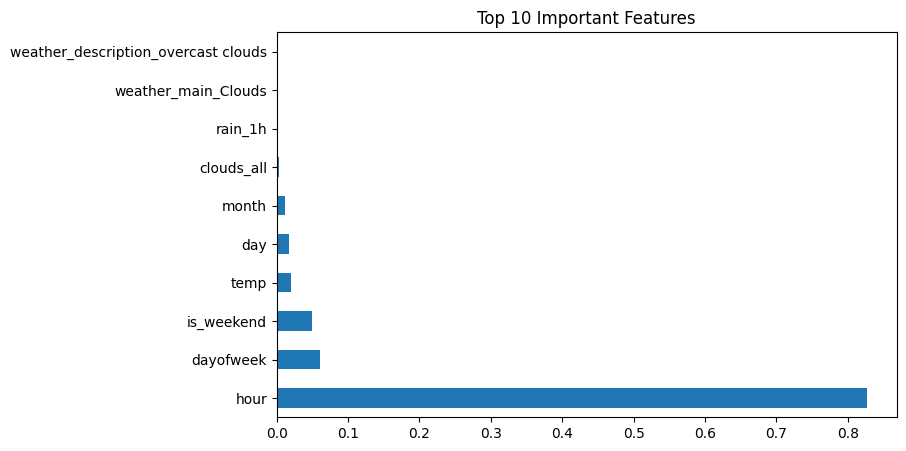

In [52]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
features = X.columns

fi = pd.Series(importances, index=features).sort_values(ascending=False)[:10]

fi.plot(kind='barh', figsize=(8,5))
plt.title("Top 10 Important Features")
plt.show()

In [53]:
# Predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

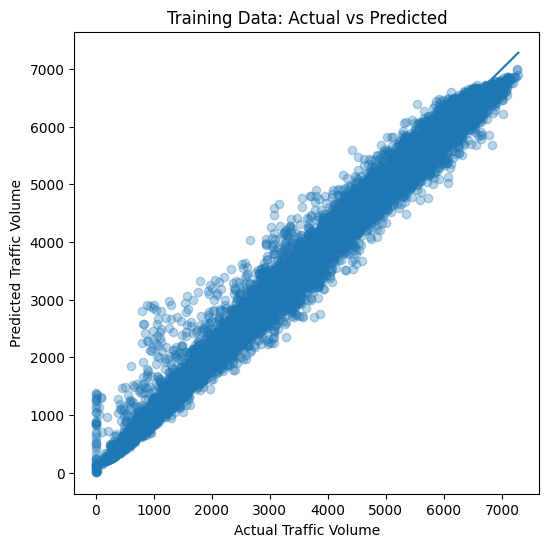

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_train, y_train_pred, alpha=0.3)
plt.xlabel("Actual Traffic Volume")
plt.ylabel("Predicted Traffic Volume")
plt.title("Training Data: Actual vs Predicted")
plt.plot([y_train.min(), y_train.max()],
         [y_train.min(), y_train.max()])
plt.show()

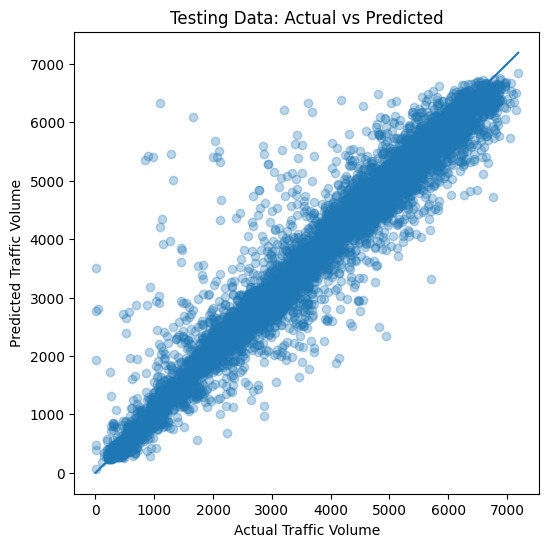

In [55]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("Actual Traffic Volume")
plt.ylabel("Predicted Traffic Volume")
plt.title("Testing Data: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.show()

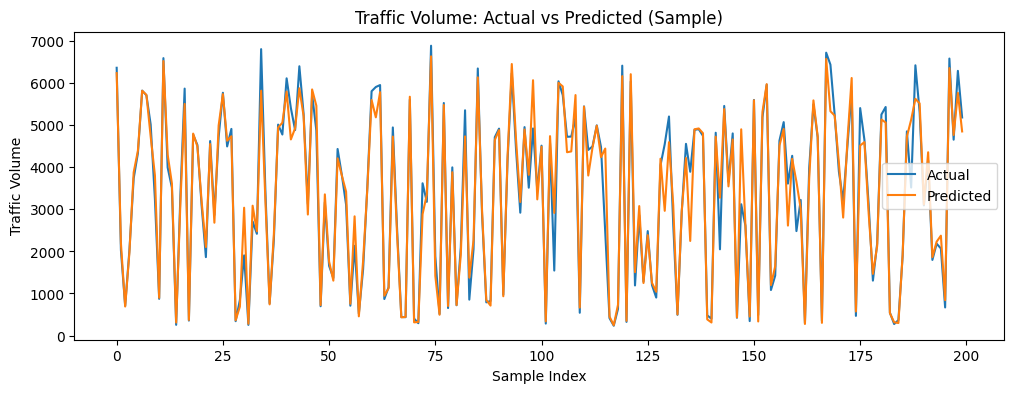

In [56]:
plt.figure(figsize=(12,4))
plt.plot(y_test.values[:200], label="Actual")
plt.plot(y_test_pred[:200], label="Predicted")
plt.legend()
plt.title("Traffic Volume: Actual vs Predicted (Sample)")
plt.xlabel("Sample Index")
plt.ylabel("Traffic Volume")
plt.show()

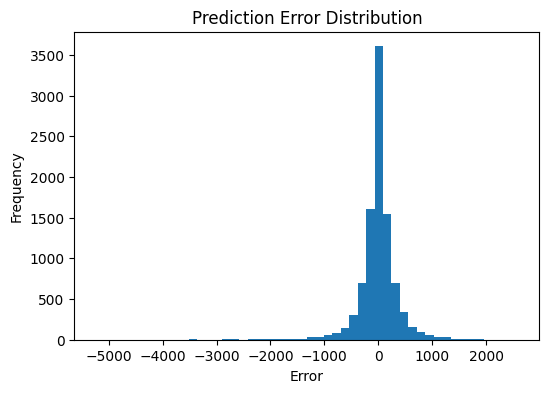

In [57]:
errors = y_test - y_test_pred

plt.figure(figsize=(6,4))
plt.hist(errors, bins=50)
plt.title("Prediction Error Distribution")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()

In [58]:
import joblib

# Save model
joblib.dump(rf, "traffic_volume_model.pkl")

print("Model saved successfully!")

Model saved successfully!


In [59]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [60]:
joblib.dump(X.columns.tolist(), "feature_columns.pkl")

['feature_columns.pkl']

In [61]:
# Load everything back
loaded_model = joblib.load("traffic_volume_model.pkl")
loaded_scaler = joblib.load("scaler.pkl")
feature_columns = joblib.load("feature_columns.pkl")

print("Model loaded successfully!")

Model loaded successfully!


In [62]:
import pandas as pd

# Example: single new sample (dummy values)
new_data = pd.DataFrame([X_test.iloc[0]], columns=feature_columns)

# Scale if needed
new_data_scaled = loaded_scaler.transform(new_data)

# Predict
prediction = loaded_model.predict(new_data_scaled)
print("Predicted Traffic Volume:", prediction[0])

Predicted Traffic Volume: 889.39898989899


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [63]:
df = pd.read_csv(os.path.join(path, "Metro_Interstate_Traffic_Volume.csv"))
df.head()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [64]:
# Convert date_time column to datetime format (required for feature extraction)
df['date_time'] = pd.to_datetime(df['date_time'], errors='coerce')

# Remove rows where date_time could not be converted
df = df.dropna(subset=['date_time'])

# ------------------- MY OWN FEATURES (Feature Engineering) -------------------

# 1. Hour feature – traffic depends on time of day
df['hour'] = df['date_time'].dt.hour

# 2. Day of week feature (0 = Monday, 6 = Sunday)
df['day_of_week'] = df['date_time'].dt.dayofweek

# 3. Weekend feature (1 = Saturday/Sunday, 0 = Weekday)
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# 4. Month feature – captures seasonal patterns
df['month'] = df['date_time'].dt.month

# 5. Peak hour feature – rush hour traffic
# Morning: 7–10 AM, Evening: 4–7 PM
df['is_peak_hour'] = df['hour'].apply(
    lambda x: 1 if (7 <= x <= 10 or 16 <= x <= 19) else 0
)

# ---------------------------------------------------------------------------

# Display dataset with new features
df[['date_time', 'hour', 'day_of_week', 'is_weekend', 'month', 'is_peak_hour']].head()


,date_time,hour,day_of_week,is_weekend,month,is_peak_hour
0,2012-10-02 09:00:00,9,1,0,10,1
1,2012-10-02 10:00:00,10,1,0,10,1
2,2012-10-02 11:00:00,11,1,0,10,0
3,2012-10-02 12:00:00,12,1,0,10,0
4,2012-10-02 13:00:00,13,1,0,10,0


In [65]:
# Festival or public holiday feature
df['is_festival'] = df['holiday'].apply(
    lambda x: 0 if x == 'None' else 1
)


In [66]:
# Indian office rush hour feature (custom feature by me)
df['is_office_rush'] = df['hour'].apply(
    lambda x: 1 if (9 <= x <= 11 or 18 <= x <= 21) else 0
)

